## PART 1 : SPOTIFY DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import warnings
import itertools
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# !pip install xgboost
import xgboost as xgb


In [2]:
os.chdir("C:/Users/joonw/Downloads/spotify_data")
df= pd.read_csv("spotify_songs.csv")
# dataframe.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [3]:
print(df['playlist_subgenre'].unique())
print(df['playlist_genre'].unique())
print(df['playlist_subgenre'].value_counts())
print(df['playlist_genre'].value_counts())

['dance pop' 'post-teen pop' 'electropop' 'indie poptimism' 'hip hop'
 'southern hip hop' 'gangster rap' 'trap' 'album rock' 'classic rock'
 'permanent wave' 'hard rock' 'tropical' 'latin pop' 'reggaeton'
 'latin hip hop' 'urban contemporary' 'hip pop' 'new jack swing'
 'neo soul' 'electro house' 'big room' 'pop edm'
 'progressive electro house']
['pop' 'rap' 'rock' 'latin' 'r&b' 'edm']
playlist_subgenre
progressive electro house    1809
southern hip hop             1675
indie poptimism              1672
latin hip hop                1656
neo soul                     1637
pop edm                      1517
electro house                1511
hard rock                    1485
gangster rap                 1458
electropop                   1408
urban contemporary           1405
hip hop                      1322
dance pop                    1298
classic rock                 1296
trap                         1291
tropical                     1288
latin pop                    1262
hip pop       

I. Check for and remove duplicates

In [4]:
df.duplicated().any()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

4. Key and mode should be categorical variables

In [5]:
print(df["key"].unique())
print(df["mode"].unique())

columns_to_convert = ['key', 'mode','playlist_subgenre','playlist_genre']

# Convert specified columns to categorical type
df[columns_to_convert] = df[columns_to_convert].astype('category')
df.info()

[ 6 11  1  7  8  5  4  2  0 10  9  3]
[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   track_id                  32833 non-null  object  
 1   track_name                32828 non-null  object  
 2   track_artist              32828 non-null  object  
 3   track_popularity          32833 non-null  int64   
 4   track_album_id            32833 non-null  object  
 5   track_album_name          32828 non-null  object  
 6   track_album_release_date  32833 non-null  object  
 7   playlist_name             32833 non-null  object  
 8   playlist_id               32833 non-null  object  
 9   playlist_genre            32833 non-null  category
 10  playlist_subgenre         32833 non-null  category
 11  danceability              32833 non-null  float64 
 12  energy                    32833 non-null  float64 
 13  ke

II. Remove high-entropy features

In general, entropy is a measure for pureness, for certainty. Similar values in a feature suggest low entropy, and diverse - high entropy. The higher entropy, the less predictive properties this feature has. 

In [6]:
print(len(df['track_id'].unique()))
print(len(df['track_name'].unique()))
print(len(df['track_artist'].unique()))
print(len(df['track_album_id'].unique()))
print(len(df['track_album_name'].unique()))
print(len(df['track_album_release_date'].unique()))
print(len(df['playlist_name'].unique()))
print(len(df['playlist_id'].unique()))

df.drop(columns = ['track_id', 'track_name', 'track_artist', 
        'track_album_id', 'track_album_name', 'track_album_release_date',
        'playlist_name','playlist_id'], inplace = True)
df.info()

28356
23450
10693
22545
19744
4530
449
471
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   track_popularity   32833 non-null  int64   
 1   playlist_genre     32833 non-null  category
 2   playlist_subgenre  32833 non-null  category
 3   danceability       32833 non-null  float64 
 4   energy             32833 non-null  float64 
 5   key                32833 non-null  category
 6   loudness           32833 non-null  float64 
 7   mode               32833 non-null  category
 8   speechiness        32833 non-null  float64 
 9   acousticness       32833 non-null  float64 
 10  instrumentalness   32833 non-null  float64 
 11  liveness           32833 non-null  float64 
 12  valence            32833 non-null  float64 
 13  tempo              32833 non-null  float64 
 14  duration_ms        32833 non-null  int64   
dtypes: categor

III. Missing values

Continuous variable: fill with mean.    
Categorical variable: fill with mode.

In [7]:
df_cont = df.select_dtypes(include=['int','float'])
df_cont = df_cont.fillna(df_cont.mean())
df_cat = df.select_dtypes(include=['category'])
df_cat = df_cat.fillna(df_cat.mode())
df_cont['index'] = range(1, df_cont.shape[0] + 1)
df_cat['index'] = range(1, df_cat.shape[0] + 1)

merged_df = pd.merge(df_cont, df_cat, on='index', how='inner')

df = merged_df
df_cat.drop(columns=['index'], inplace = True)
df_cont.drop(columns=['index'], inplace = True)
df.drop(columns=['index'], inplace = True)


5. Check categorical variables are evenly distributed

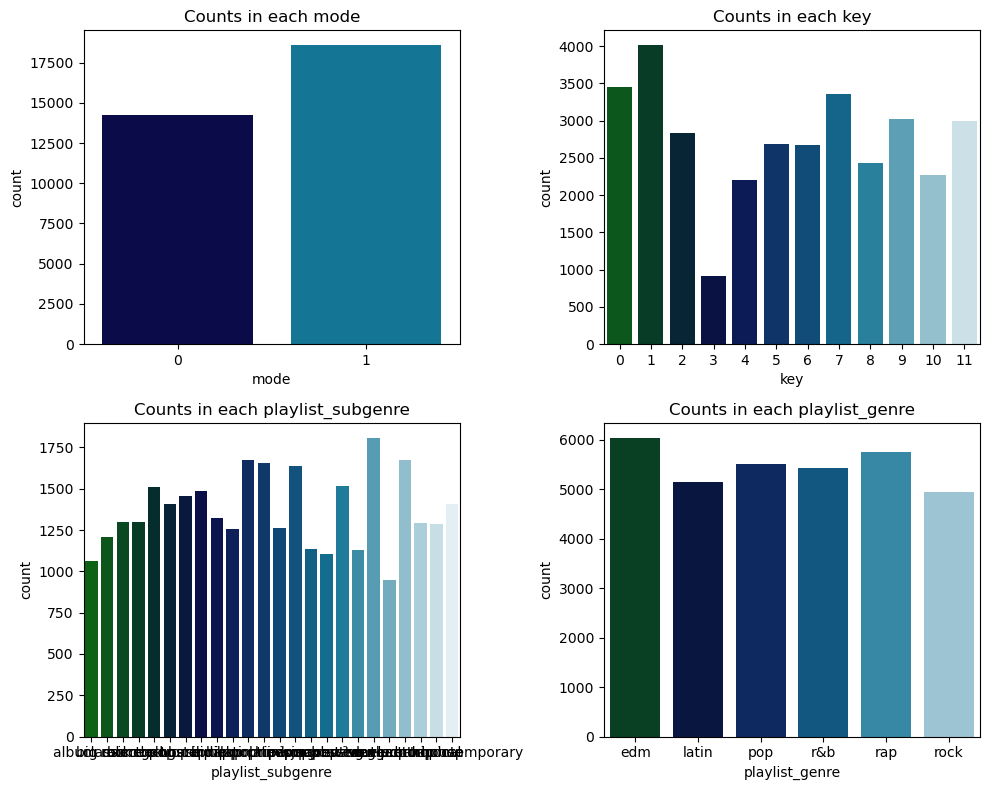

In [8]:
# import matplotlib.pyplot as plt
# import seaborn as sns

def plot_counts(feature, order=None, ax=None):
    sns.countplot(x=feature, data=df, palette="ocean", order=order, ax=ax)
    ax.set_title(f"Counts in each {feature}")

# Set up a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each count plot in the respective subplot
plot_counts("mode", ax=axes[0, 0])
plot_counts("key", ax=axes[0, 1])
plot_counts("playlist_subgenre", ax=axes[1, 0])
plot_counts("playlist_genre", ax=axes[1, 1])

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

6. Scaling continuous variables and check for outliers

Scale Sensitivity of Algorithms:

Some machine learning algorithms are sensitive to the scale of input features. For example, linear regression, support vector machines, and k-nearest neighbors are scale-sensitive. Rescaling ensures that all features contribute equally to the model.
Gradient Descent Convergence:

Algorithms that use gradient descent for optimization may converge faster when features are on a similar scale. This is particularly important for neural networks and deep learning models.

Decision trees and random forests are generally less sensitive to outliers, while linear regression can be influenced by extreme values.

Tree-based models (decision trees, random forests, gradient boosting) are generally not sensitive to feature scaling because they make decisions based on splits and do not involve distance calculations.



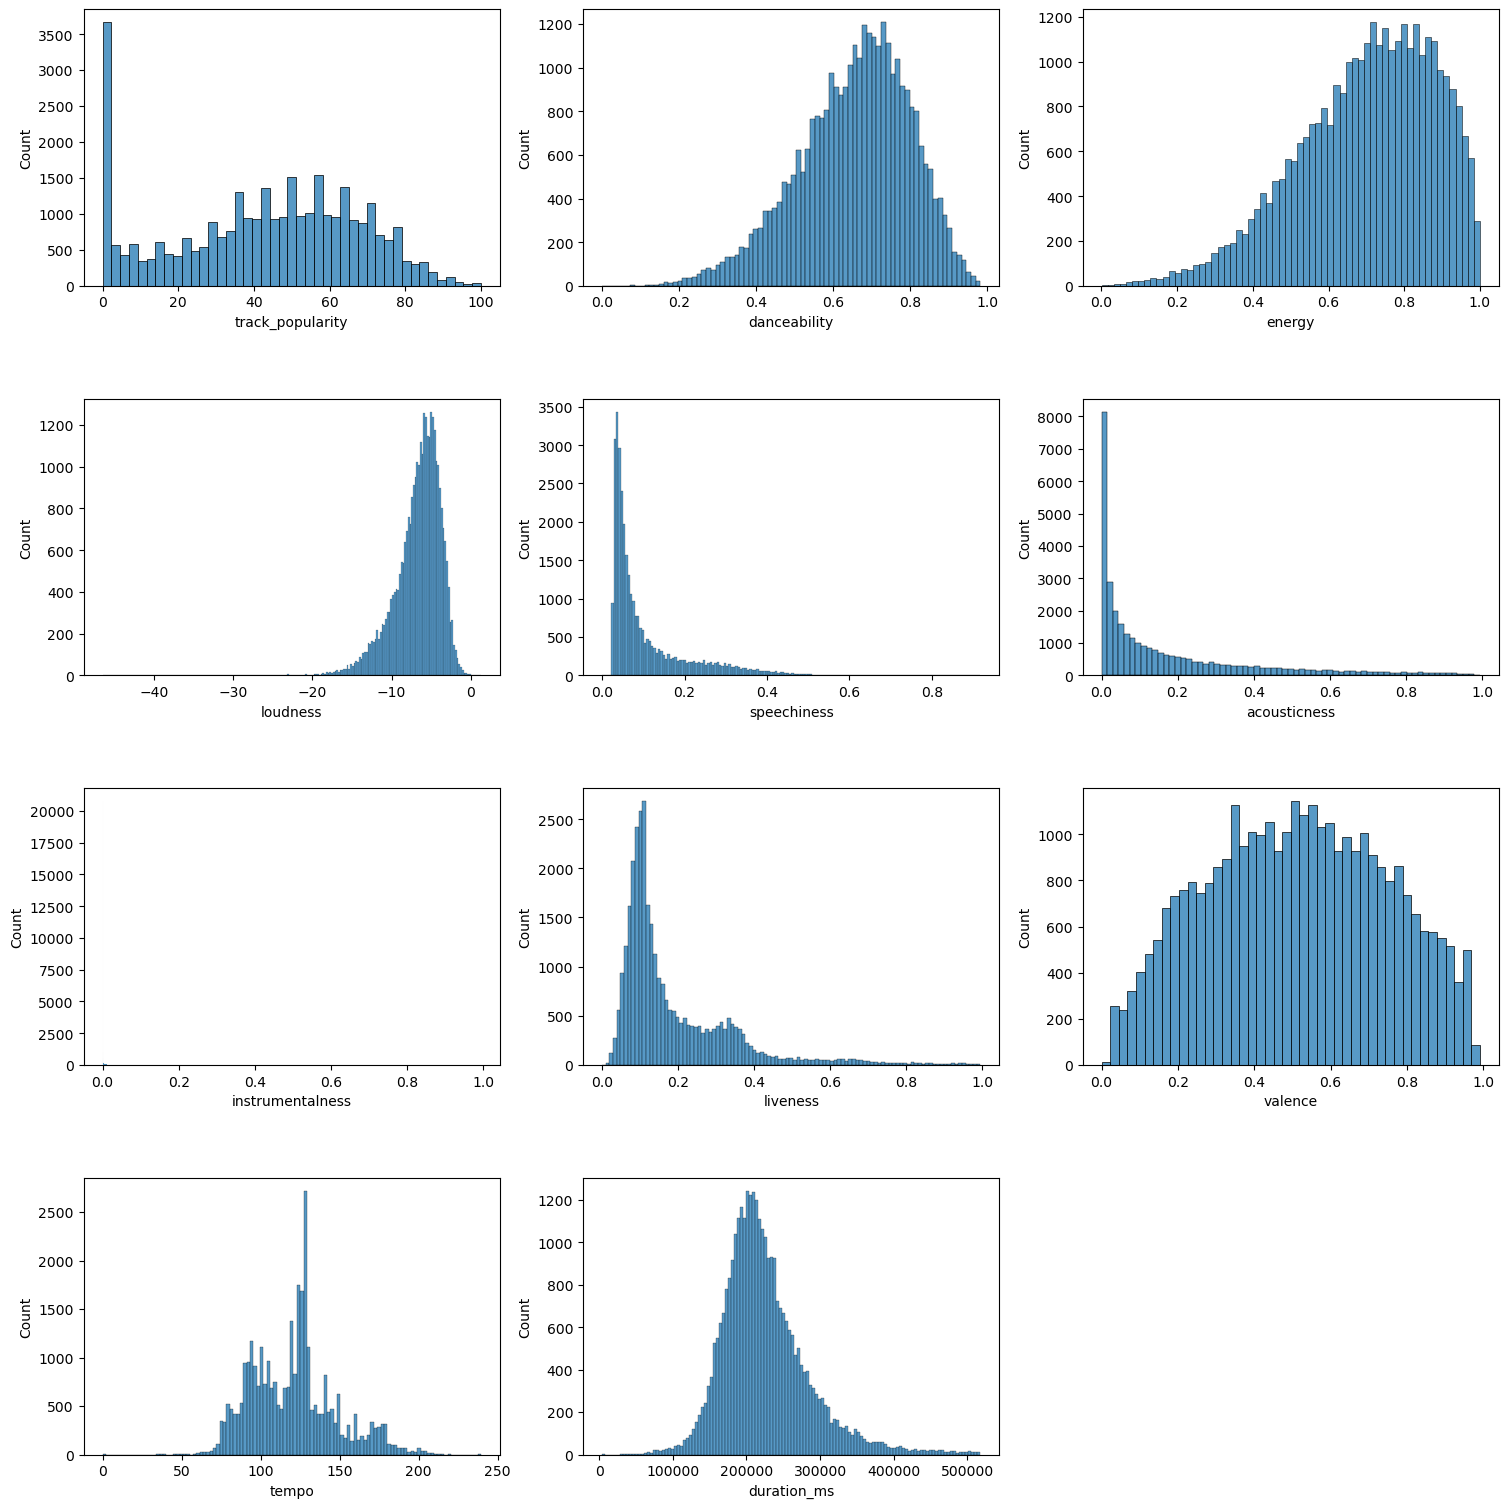

In [9]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in df_cont.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

It seems we need to rescale data.

In [10]:
# Standardize each column using a loop
for i in range(df_cont.shape[1]):
    df_cont.iloc[:, i] = (df_cont.iloc[:, i] - df_cont.iloc[:, i].mean()) / df_cont.iloc[:, i].std()


Now transform data using yeojohnson. 

In [11]:
from scipy.stats import yeojohnson

for i in range(df_cont.shape[1]):
    df_cont.iloc[:, i], lambda_value  = yeojohnson(df_cont.iloc[:, i])

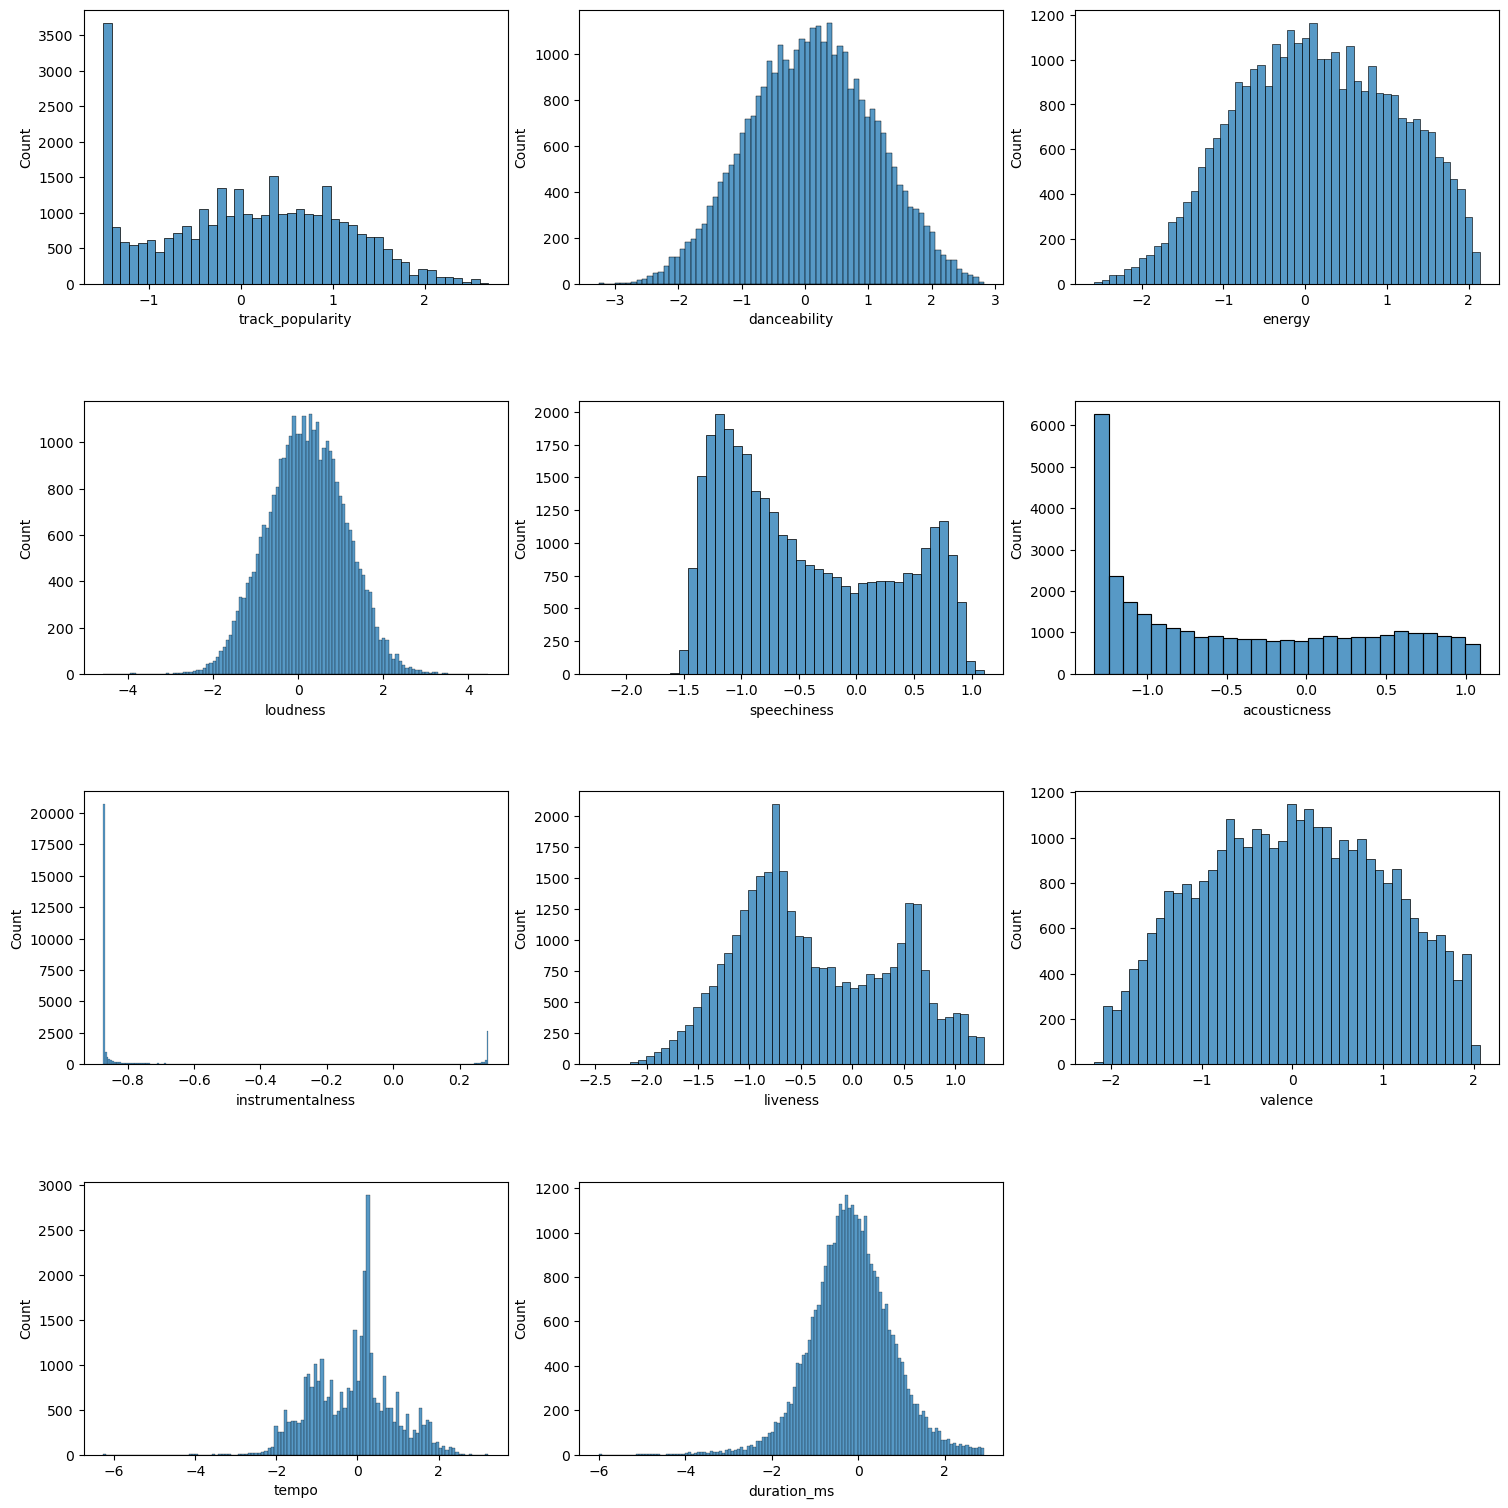

In [12]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in df_cont.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Now investigate outliers.

From above and bleow, it seems tempo, druation_ms, danceability have outliers.

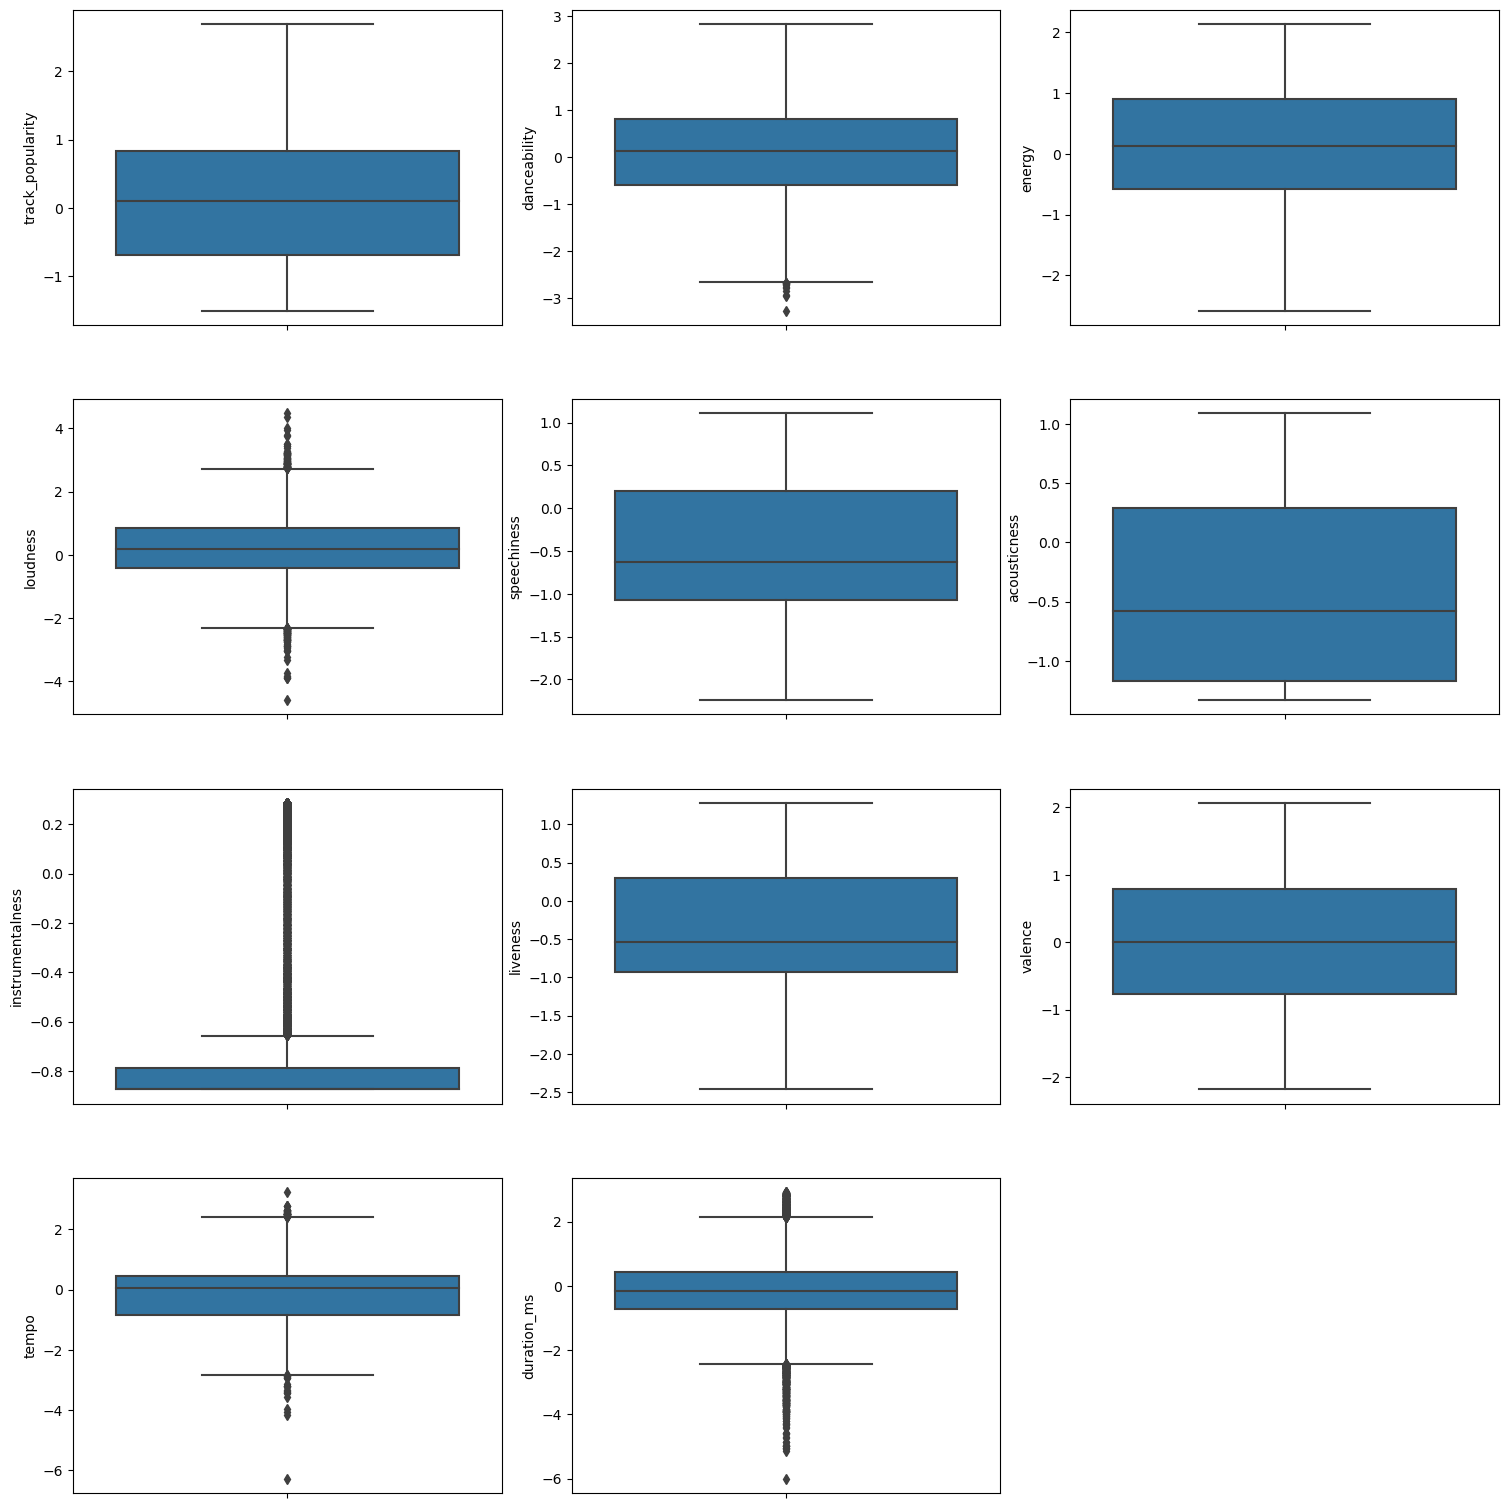

In [13]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in df_cont.items():
    sns.boxplot(y = k, data = df_cont, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [14]:
# tempo, druation_ms, danceability have outliers.

def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to exclude outliers
    data_no_outliers = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

    return data_no_outliers

tmp1 = ['danceability','tempo','duration_ms']
for i in range( len(tmp1) ):
    df_cont= remove_outliers_iqr(df_cont,tmp1[i])
    

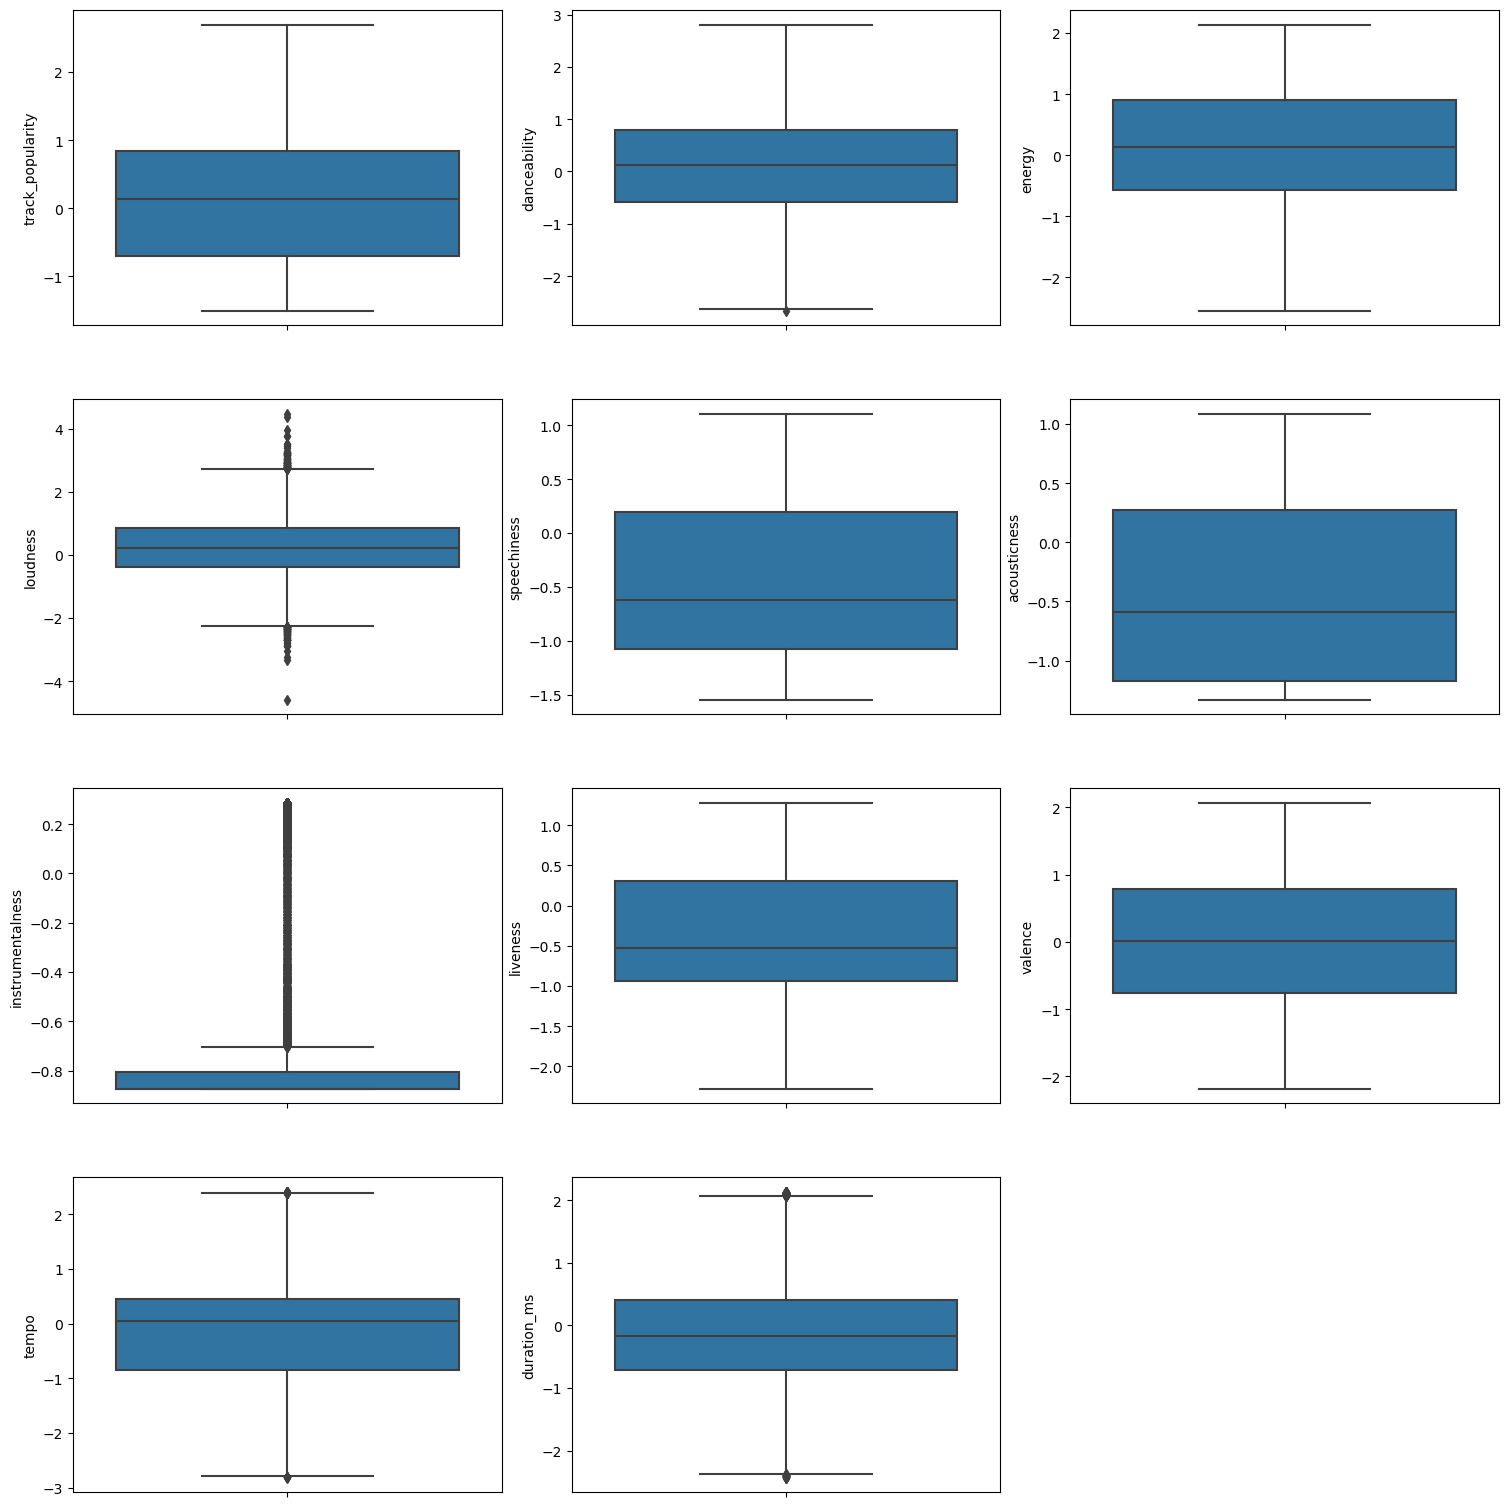

In [15]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
idx = 0
axs = axs.flatten()
for k, v in df_cont.items():
    sns.boxplot(y = k, data = df_cont, ax = axs[idx])
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Seems good. Merge data again.

In [16]:
df_cont['index'] = range(1, df_cont.shape[0] + 1)
df_cat['index'] = range(1, df_cat.shape[0] + 1)

merged_df = pd.merge(df_cont, df_cat, on='index', how='inner')

df = merged_df
df_cat.drop(columns=['index'], inplace = True)
df_cont.drop(columns=['index'], inplace = True)
df.drop(columns=['index'], inplace = True)


Now Encode categorical data

Most Machine Learning algorithms cannot work with strings. It should be noted here that LabelEncoder() memorizes the classes. Therefore, an encoder is instantiated for each categorical variable. The labels (i.e., the music genre) are not encoded, which will make interpretation easier and more understandable. Tree-based algorithms accept string labels.

In [17]:
mode_encoder = LabelEncoder()
df2 = df

df["playlist_subgenre"] = mode_encoder.fit_transform(df["playlist_subgenre"])
df["mode"] = mode_encoder.fit_transform(df["mode"])
df["key"] = mode_encoder.fit_transform(df["key"])

In [18]:
df

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_genre,playlist_subgenre,key,mode
0,1.020459,0.698192,1.458709,1.876580,-0.702145,-0.421362,-0.874219,-1.319639,0.031909,0.042654,-0.578451,pop,3,6,1
1,1.066768,0.524036,0.722432,0.685649,-1.159221,-0.644292,-0.797727,0.631810,0.783566,-0.855313,-1.287559,pop,3,11,1
2,1.206898,0.141775,1.575559,1.436840,-0.421499,-0.588675,-0.873783,-0.723440,0.439739,0.114292,-0.965914,pop,3,1,0
3,0.747061,0.462024,1.567712,1.256473,-0.052195,-1.033603,-0.874043,0.084282,-1.000132,0.039717,-1.136242,pop,3,7,1
4,1.159990,-0.033255,0.846859,0.820528,-1.193398,-0.581656,-0.874219,-1.061870,0.921179,0.113141,-0.696602,pop,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31937,-0.019056,-1.326477,1.505228,2.361718,-0.148563,-0.610704,-0.874219,-1.297226,-1.286574,0.261027,-0.387091,edm,18,0,1
31938,-0.833796,-0.820674,0.528663,0.918941,-1.047950,-1.311655,-0.796670,0.671578,-0.473797,0.256563,1.557471,edm,18,7,1
31939,-1.040087,-0.781047,0.763562,0.716980,-0.911367,-0.380026,-0.874199,-0.309987,-0.319606,0.254762,-0.277970,edm,18,2,0
31940,-1.006069,-0.193216,1.245583,1.474633,0.018762,-1.245062,0.129810,0.598631,-0.867541,0.255420,1.693548,edm,18,5,1


Finally, lets do random forest first

In [19]:
music_labels = df['playlist_genre']

In [20]:
music_features = df.drop(columns=['playlist_genre'], inplace=True )
music_features = df

When you set stratify=music_labels, it means that the split will be done in a way that maintains the same proportion of different classes in both the training and testing sets as in the original dataset.

In [264]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(music_features, music_labels, test_size=0.2, 
                                                    stratify = music_labels, random_state=42)


In [21]:
tr_val_f, test_features, tr_val_l, test_labels = train_test_split(
    music_features, music_labels, test_size = 0.1, stratify = music_labels)
train_features, val_features, train_labels, val_labels = train_test_split(
    tr_val_f, tr_val_l, test_size = len(test_labels), stratify = tr_val_l)

VI. Modelling
There are various classification algorithms. Random Forest is quite a common one. Its success, i.e., how well it will be capable to predict a label, will be measured with several success metrics. The most popular ones are "accuracy" and "f1 score". The former shows the ratio between true predictions and all samples ( accuracy=TP+TNTP+TN+FP+FN
 ). "f1 score" is the harmonic mean between "precision" ( TPTP+FP
 ) and "recall" ( TPTP+FN
 ). It is computed with the following formula:  f1score=2TP2TP+FP+FN
 .

GridSearchCV() is used to find a combination of hyper-parameters that returns the highest success metrics. It requires specifying one success metric; it is better to use "f1_score" instead the default one ("accuracy"). In general, "accuracy" is preferred when the class distribution is similar, while "f1_score" is used for imbalanced classes. Despite the similar distribution of genres in the music dataset, "f1_score" is a little bit more reliable. It should be instantiated with make_scorer before being passed to GridSearch().

In [22]:
from sklearn.metrics import make_scorer, f1_score

f1 = make_scorer(f1_score, average = "weighted")

RandomForestClassifier() has many tunable hyper-parameters but the most important ones are the number of estimators (i.e., the number of trees that are going to find the relationships between data points), and their maximum depth - the number of levels with nodes where computations happen. Another appropriate hyper-parameter is the number of samples per leaf, which specifies the minimum number of samples required to be at a leaf node. A range of values per hyper-parameter is defined in a dictionary. It is passed to the searching algorithm, along with the number of folds for cross-validation.

In [23]:
params = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [5, 10, 15, 20, 25],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid = params, scoring = f1, cv = 5)

The instantiated search algorithm gets the training data. It will be used for finding the combination of hyper-parameters that returns the highest "f1_score".

In [273]:
# took 20 minutes
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 35]},
             scoring=make_scorer(f1_score, average=weighted))

In [275]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 35}

In [25]:
model = RandomForestClassifier(n_estimators = 35, max_depth = 20, 
                               min_samples_leaf = 1)

model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=20, n_estimators=35)

VII. Model Performance  
VII.1. Accuracy and f1 score  
To spare space and time, all computations related to the classification task are wrapped in a function. It predicts the labels and evaluates model performance in terms of "accuracy" and "f1_score".

In [26]:
def classification_task(estimator, features, labels):
    """
    Evaluates classification by predicting ("predict") and evaluation ("score") of the modelling alogirthm.
    
    Arguments: 
        Estimator, features (X) and labels (y).
    
    Returns: 
        Model's performance measured in terms of accuracy and f1_score.
    """
    predictions = estimator.predict(features)
    
    print(f"Accuracy: {accuracy_score(labels, predictions)}")
    print(f"F1 score: {f1_score(labels, predictions, average = 'weighted')}")

In [27]:
classification_task(model, train_features, train_labels)

Accuracy: 1.0
F1 score: 1.0


In [28]:
classification_task(model, val_features, val_labels)

Accuracy: 0.9226917057902974
F1 score: 0.9224728895074511


VII.2. Classification report  

The classification_report shows "precision", "recall", and "f1" scores for all classes. Thus, it could be seen that the model is not very good at guessing the label of rock and alternative songs but performs well for classical music.

In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, model.predict(test_features)))

              precision    recall  f1-score   support

         edm       0.93      0.91      0.92       515
       latin       0.89      0.94      0.91       516
         pop       0.94      0.89      0.91       551
         r&b       0.93      0.96      0.94       543
         rap       0.95      0.94      0.95       575
        rock       0.95      0.94      0.94       495

    accuracy                           0.93      3195
   macro avg       0.93      0.93      0.93      3195
weighted avg       0.93      0.93      0.93      3195



VII.3. Confusion matrix

The confusion matrix shows the number of properly and wrongly classified samples. The code lines below load it. The results are interpreted thereafter.

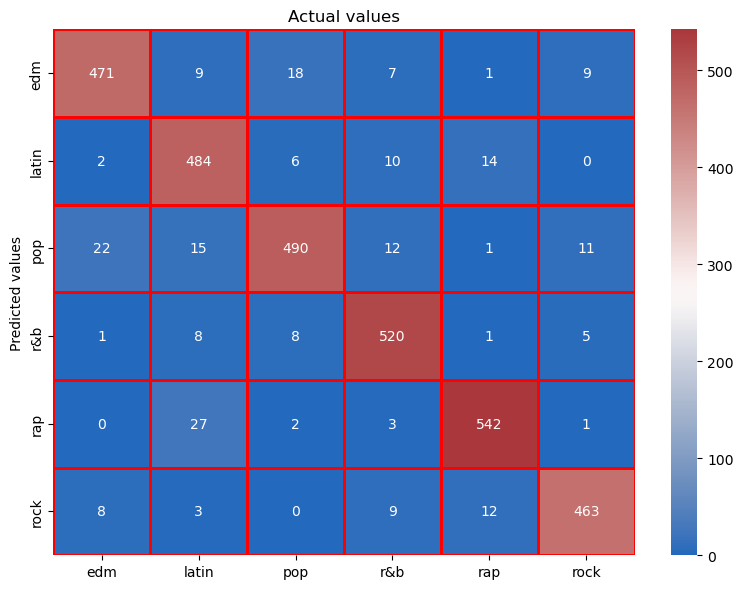

In [30]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(test_labels, model.predict(test_features)),
    annot = True,
    fmt = ".0f",
    cmap = "vlag",
    linewidths = 2,
    linecolor = "red",
    xticklabels = model.classes_,
    yticklabels = model.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

Properly classified samples are shown on the diagonal - the squares colored in red. It could be seen that True Positives (i.e., correct predictions) prevail. Wrong guessings are located below and above the diagonal. The genre of 140 songs was properly predicted as "Alterntive". Twelve were said to be "Anime", 20 - "Blues", and so on, but their actual class was "Alternative". On the other hand (look at the horizontal rows), 4 songs identified as "Alternative" were in fact "Anime", 6 are "Blues", etc.

VII.4. Feature importance

Tree-based algorithms compute feature importance, i.e., how important each feature is for model performance. It seems (see the output below) popularity (feature No. 1), along with acousticness and danceabilty are the ones that most helped for predicting a song's genre.

In [31]:
model.feature_importances_

array([0.04384027, 0.06124223, 0.04930799, 0.04737681, 0.06913389,
       0.04898775, 0.03897659, 0.03020503, 0.04992496, 0.06650753,
       0.04728055, 0.41657506, 0.02304866, 0.00759266])

VII.5. ROC curve

A popular classification metric is the ROC curve (Receiver Operating Characteristic curve). It is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate and False Positive Rate. Area Under the Curve (AUC) represents the probability that a random positive example is positioned to the right of a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.

AUC and ROC curve require computing probability prediction scores. These show the probability a certain sample belongs to a particular class.

In [32]:
predicted_labels = model.predict_proba(test_features)

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, predicted_labels, multi_class = "ovr")

0.9944332591755444

92% AUC is quite a good result. This shows that many samples were properly predicted. Curves positioned to the top-left corner suggest a really well performing model.

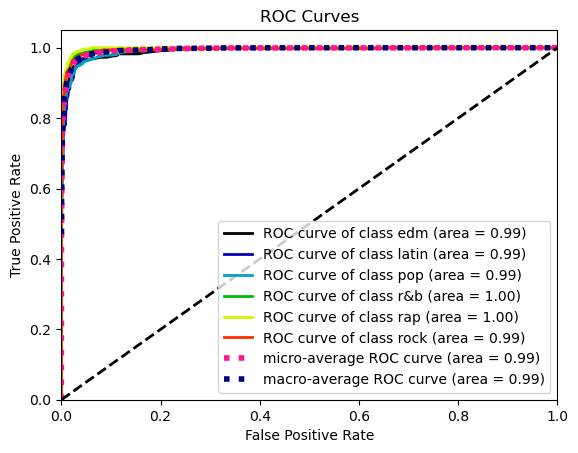

In [35]:
# !pip install scikit-plot
import scikitplot as skplt

skplt.metrics.plot_roc(test_labels, predicted_labels)
plt.show()

# Neural Network